In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
X_test = pd.read_csv('D:\Загрузки всякие\X_test.csv')
X_train = pd.read_csv('D:\Загрузки всякие\X_train.csv')
y_test = pd.read_csv('D:\Загрузки всякие\y_test_sample.csv')
y_train = pd.read_csv('D:\Загрузки всякие\y_train.csv')

In [2]:
X_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0
...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0


<AxesSubplot: ylabel='mortgage_loans'>

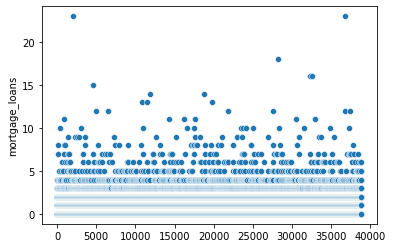

In [3]:
sns.scatterplot(X_test.mortgage_loans)

<AxesSubplot: ylabel='credits_loans'>

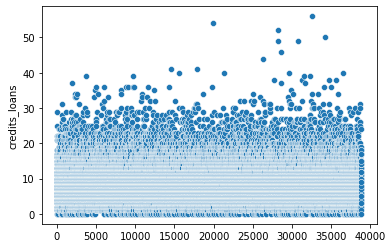

In [4]:
sns.scatterplot(X_test.credits_loans)

<AxesSubplot: ylabel='monthly_income'>

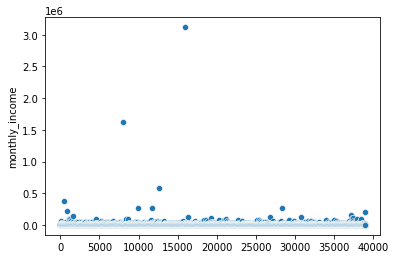

In [5]:
sns.scatterplot(X_test.monthly_income)

<AxesSubplot: ylabel='debt_to_income'>

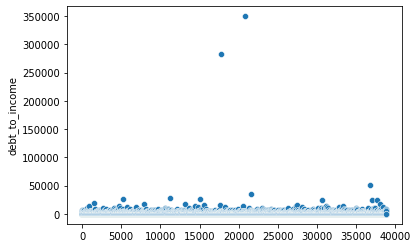

In [6]:
sns.scatterplot(X_test.debt_to_income)

<AxesSubplot: ylabel='credit_card_utilization'>

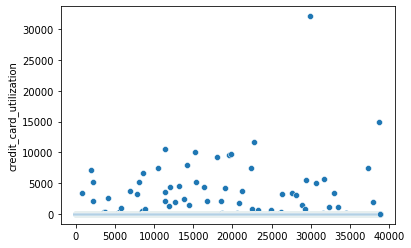

In [7]:
sns.scatterplot(X_test.credit_card_utilization)

C:\Users\Шамсутдинов Аяз\AppData\Local\Temp\ipykernel_11932\813467062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

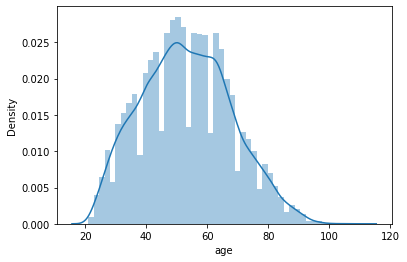

In [8]:
sns.distplot(X_test['age'])

<AxesSubplot: >

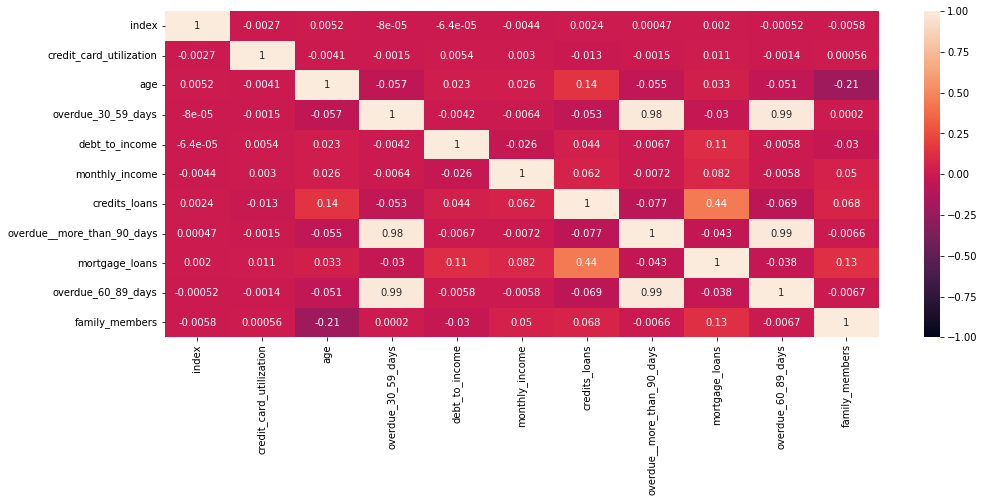

In [9]:
X_test.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True ) 

# Удалим выбросы

In [4]:
X_train['index'] = np.arange(len(X_train))

In [5]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.01)
    q3 = df_in[col_name].quantile(0.99) 
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [6]:
X_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,index
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,1
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,2
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,3
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0,105104
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0,105105
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0,105106
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0,105107


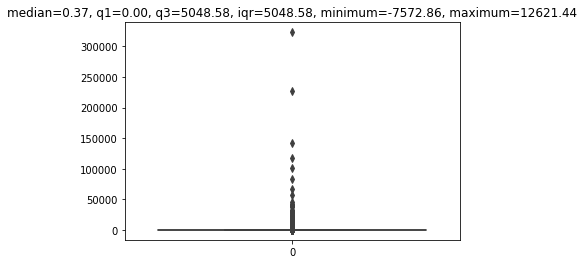

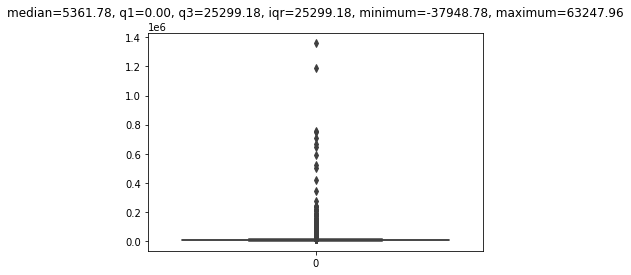

debt_to_income has 71 outliers
monthly_income has 147 outliers


In [7]:
box_and_whisker(X_train, 'debt_to_income')
box_and_whisker(X_train, 'monthly_income')



_, _, _, _, minimum_credit_card_utilization_before, maximum_credit_card_utilization_before = get_iqr_values(X_train, 'debt_to_income')

# %% Count the outliers in the original data frame
print(f"debt_to_income has {count_outliers(X_train, 'debt_to_income')} outliers")
print(f"monthly_income has {count_outliers(X_train, 'monthly_income')} outliers")


rows before removing: 105109
rows after removing: 83959


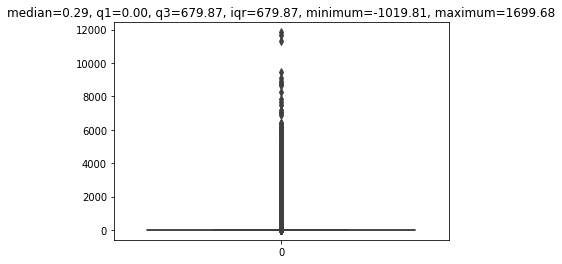

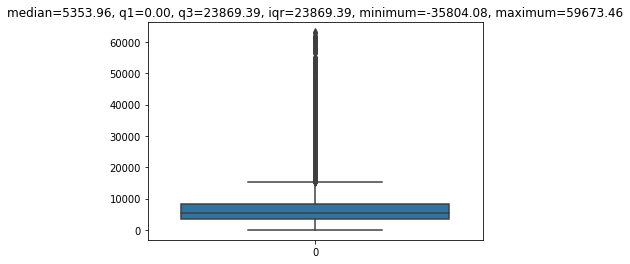

In [8]:
# %% Remove the outliers
print(f"rows before removing: {X_train.shape[0]}")
X_train = remove_outliers(X_train, 'debt_to_income')
X_train = remove_outliers(X_train, 'monthly_income')


print(f"rows after removing: {X_train.shape[0]}")

# Let's have a look at the end-result. Here is something very strange though, our data still appears to have outliers!
box_and_whisker(X_train, 'debt_to_income')
box_and_whisker(X_train, 'monthly_income')

_, _, _, _, minimum_credit_card_utilization_after, maximum_credit_card_utilization_after = get_iqr_values(X_train, 'debt_to_income')


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83959, 11), (38876, 11), (105109, 1), (38876, 2))

# Заполним пропуски

In [10]:
# если просто удалить выбросы и заполнить пропуски, то Score: 0.85090

In [11]:
X_train['monthly_income'].fillna(int(X_train['monthly_income'].median()), inplace=True)
X_test['monthly_income'].fillna(int(X_test['monthly_income'].median()), inplace=True)

In [12]:
X_train['family_members'].fillna(0, inplace=True)
X_test['family_members'].fillna(0, inplace=True)

In [13]:
X_train['family_members'] = X_train['family_members'].astype(int)

In [14]:
X_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,index
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0,1
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0,2
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3,3
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0,105104
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0,105105
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0,105106
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0,105107


# Заменим часть столбцов

Я решил заменить значения столбцов overdue на 1 и 0.
Также я решил проверить несколько гипотез:
 а) Заменил значение месячного заработка на "высокий", "Средний", "низкий", но это ухудшило скор
 б)Заменил количество членов в семье на "больше 5 человек", "средняя", "до 2 людей", но это тоже ухудшило скор
Поэтому я решил оставить эти колонки без изменений

In [15]:
X_train['overdue_30'] = (X_train['overdue_30_59_days'] != 0)*1
X_train['overdue_90'] = (X_train['overdue__more_than_90_days'] != 0)*1
X_train['overdue_60'] = (X_train['overdue_60_89_days'] != 0)*1
#X_train['family_kids'] = ((X_train['family_members'] >= 3) & (X_train['family_members'] <=5) )*1
#X_train['family_only_par'] = (X_train['family_members'] < 2)*1
#X_train['family_two_par'] = (X_train['family_members'] ==2)*1
#X_train['family_big'] = (X_train['family_members'] > 5 )*1

In [16]:
X_train = X_train.drop(['overdue_30_59_days','overdue__more_than_90_days', 'overdue_60_89_days'], axis=1)

In [17]:
X_test['overdue_30'] = (X_test['overdue_30_59_days'] != 0)*1
X_test['overdue_90'] = (X_test['overdue__more_than_90_days'] != 0)*1
X_test['overdue_60'] = (X_test['overdue_60_89_days'] != 0)*1
#X_test['family_kids'] = ((X_test['family_members'] >= 3) & (X_test['family_members'] <=5) )*1
#X_test['family_only_par'] = (X_test['family_members'] < 2)*1
#X_test['family_two_par'] = (X_test['family_members'] ==2)*1
#X_test['family_big'] = (X_test['family_members'] > 5 )*1

In [18]:
X_test= X_test.drop(['overdue_30_59_days','overdue__more_than_90_days', 'overdue_60_89_days'], axis=1)

In [19]:
# если заменить и overdue и family, то Score: 0.84945
# если заменить только overdue, то Score: 0.85234
#mortgage лучше не трогать, т.к. Score падает до 0.84854

In [20]:
X_train

,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members,index,overdue_30,overdue_90,overdue_60
0,0.000000,56,0.504328,6823.894458,9,1,5,0,0,0,0
1,0.170659,45,2.405860,356.580765,5,0,0,1,1,0,0
2,0.342176,75,0.445066,20349.895825,9,3,0,2,1,0,0
3,0.046219,50,0.814508,2894.368968,12,1,3,3,0,0,0
4,0.679556,58,0.390311,24833.227614,15,4,2,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0.184589,9928.125255,6,2,0,105104,0,0,0
105105,0.980631,25,0.158753,2187.355843,3,0,0,105105,0,0,0
105106,0.050256,73,0.849711,3961.841113,12,2,0,105106,1,0,0
105107,0.447882,43,0.068033,3705.546719,4,0,0,105107,0,0,1


### Т.к. до этого мы удалили некоторые строки в test и train,  нам нужно также эти строки удалить в y_train и y_test

In [21]:
#берем все индексы, которые встречаются в фрейме тест после удаление некоторых строк из-за выбросов
list_train = X_train['index'].tolist()

In [22]:
#вклеим индексы, чтобы потом удалить те, которые не нужны
y_train['index'] = np.arange(len(y_train))
y_train
# у y_test итак есть колонка с индексами

,target,index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
105104,0,105104
105105,0,105105
105106,0,105106
105107,0,105107


In [23]:
#удаление этих строк, а точнее отбор тех, которые есть в обновленном train
y_train_after_analisys = y_train[np.isin(y_train['index'],list_train)]

In [24]:
X_test.shape, X_train.shape, y_train_after_analisys.shape, y_test.shape

((38876, 11), (83959, 11), (83959, 2), (38876, 2))

In [25]:
# удалим колонку index,  которой изначально не было
y_train_after_analisys = y_train_after_analisys.drop(['index'], axis = 1)

In [26]:
X_train = X_train.drop(['index'],axis = 1)

In [27]:
X_test.shape, X_train.shape, y_train_after_analisys.shape, y_test.shape

((38876, 11), (83959, 10), (83959, 1), (38876, 2))

In [28]:
X_train.dtypes

credit_card_utilization    float64
age                          int64
debt_to_income             float64
monthly_income             float64
credits_loans                int64
mortgage_loans               int64
family_members               int32
overdue_30                   int32
overdue_90                   int32
overdue_60                   int32
dtype: object

# XGBoost подбор параметров

In [26]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
estimator = XGBClassifier(
    refresh_leaf=0, verbosity = 0, reg_alpha=0,reg_lambda=10,
                    n_estimator = 150, seed = 42
)

In [30]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05,0.3]
}

In [31]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True,
)

In [33]:
grid_search.fit(X_train, y_train_after_analisys)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimator=150, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     predictor=None, random_state=None,
                                     refresh_leaf=0, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.3],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [38]:
grid_search.best_score_

0.8529295618637553

In [36]:
y_pred = grid_search.predict_proba(X_test.loc[:, X_test.columns != 'index'])
y_pred

array([[0.99437916, 0.00562084],
       [0.99200076, 0.00799921],
       [0.86149585, 0.13850415],
       ...,
       [0.95800704, 0.04199294],
       [0.93834627, 0.06165374],
       [0.99609226, 0.00390773]], dtype=float32)

In [37]:
pd.DataFrame({'index':list(y_test['index']),'target':list(y_pred[:,1])}).to_csv('D:\Загрузки всякие\ddd_xg_4', index = False)

# Градиентный бустинг

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [20]:
parameters = {
    'n_estimators': [100,150,200,250],
    'max_depth':    [7,10,13, None]
}

In [24]:
gr_gb = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1, scoring='roc_auc')
gr_gb.fit(X_train,y_train_after_analisys)

D:\python\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13, None],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='roc_auc')

In [25]:
gr_gb.best_score_

0.8481736561768238

In [26]:
gr_gb.best_params_

{'max_depth': 7, 'n_estimators': 100}

# Scaling

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
train_scaled = scaler.fit_transform(X_train)
train_scaled

array([[-0.02266507,  0.25490427, -0.08702699, ..., -0.45180481,
        -0.24122836, -0.23355799],
       [-0.02201929, -0.50582921, -0.07994802, ...,  2.21334519,
        -0.24122836, -0.23355799],
       [-0.02137026,  1.56889846, -0.08724761, ...,  2.21334519,
        -0.24122836, -0.23355799],
       ...,
       [-0.0224749 ,  1.43058328, -0.08574121, ...,  2.21334519,
        -0.24122836, -0.23355799],
       [-0.02097026, -0.64414439, -0.08865122, ..., -0.45180481,
        -0.24122836,  4.28159182],
       [-0.02053166, -0.16004126, -0.08784111, ...,  2.21334519,
        -0.24122836, -0.23355799]])

In [32]:
test_scaled = scaler.transform(X_test.loc[:, X_test.columns != 'index'])
test_scaled

array([[-0.02258534,  0.53153462, -0.08821612, ..., -0.45180481,
        -0.24122836, -0.23355799],
       [-0.02262729,  2.05300158, -0.08724315, ..., -0.45180481,
        -0.24122836, -0.23355799],
       [-0.0206399 , -0.64414439, -0.08739186, ...,  2.21334519,
        -0.24122836, -0.23355799],
       ...,
       [-0.0223449 , -0.02172609, 19.59730227, ..., -0.45180481,
        -0.24122836, -0.23355799],
       [-0.01985838, -0.09088368, -0.08749595, ..., -0.45180481,
        -0.24122836, -0.23355799],
       [-0.02261123,  0.87732257, -0.08889584, ..., -0.45180481,
        -0.24122836, -0.23355799]])

   ## Логистическая регрессия

In [33]:
from sklearn import metrics

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold

In [36]:
params = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':np.logspace(-7, 0 ,20)}]

In [37]:
lr = LogisticRegression(class_weight='balanced', random_state=5)
cv = StratifiedKFold(shuffle = True, n_splits=5,random_state=5)
GS_LR = GridSearchCV(estimator = lr, param_grid = params, cv=cv, scoring = 'roc_auc')

In [38]:
GS_LR.fit(X = train_scaled, y = y_train_after_analisys)

D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])}],
             scoring='roc_auc')

In [39]:
GS_LR.best_params_

{'C': 0.0004832930238571752}

In [40]:
GS_LR.best_score_

0.8094354218535603

In [47]:
y_pred = GS_LR.predict_proba(test_scaled)
y_pred

array([[8.00079377e-01, 1.99920623e-01],
       [8.15284599e-01, 1.84715401e-01],
       [2.84437964e-01, 7.15562036e-01],
       ...,
       [7.77906900e-01, 2.22093100e-01],
       [6.83055237e-01, 3.16944763e-01],
       [9.99687701e-01, 3.12299326e-04]])

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, GS_LR.predict(test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: continuous-multioutput format is not supported